<a href="https://colab.research.google.com/github/pvdklei/modelsmakemodels/blob/master/pepijn/autoencoder_alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn, optim
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import utils
import train
import importlib
import visual_tools as vt
train = importlib.reload(train)
vt = importlib.reload(vt)

In [ ]:
def loaders():
    traintransform = transforms.Compose([transforms.ToTensor(),
                                         transforms.Resize(128),
                                         transforms.RandomHorizontalFlip(), 
                                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    testtransform = transforms.Compose([transforms.ToTensor(),
                                        transforms.Resize(128),
                                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    batch_size = 32
    num_workers = 2

    trainset = datasets.CIFAR10("/data/cifar10/train", train=True, transform=traintransform, download=True)
    trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers)

    testset = datasets.CIFAR10("/data/cifar10/test", train=False, transform=testtransform, download=True)
    testloader = DataLoader(testset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
    return trainloader, testloader

Extracting /data/cifar10/train/cifar-10-python.tar.gz to /data/cifar10/train



Extracting /data/cifar10/test/cifar-10-python.tar.gz to /data/cifar10/test




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


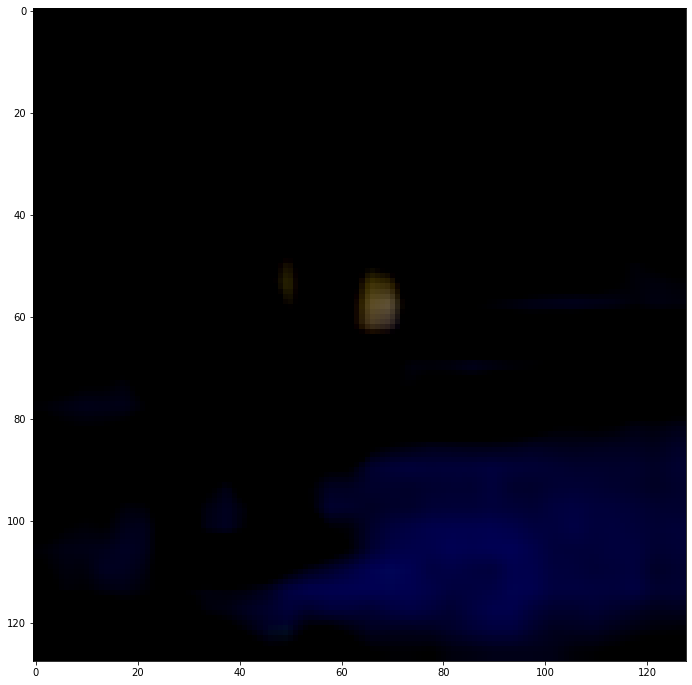

In [ ]:
trainloader, _ = loaders()
images, labels = next(iter(trainloader))
vt.show_image(images[3])

In [ ]:
encoder = models.alexnet(pretrained=False).features

# custom decoder
decoder = nn.Sequential(nn.ConvTranspose2d(256, 256, 4, stride=2, padding=1),
                        nn.ReLU(),
                        nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1),
                        nn.ReLU(),
                        nn.ConvTranspose2d(128, 128, 4, stride=2, padding=1),
                        nn.ReLU(),
                        nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1),
                        nn.ReLU(),
                        nn.ConvTranspose2d(64, 32, 4, stride=2, padding=1),
                        nn.ReLU(),
                        nn.ConvTranspose2d(32, 3, 4, stride=2, padding=1),
                        transforms.Resize(128))

model = nn.Sequential(encoder, decoder)
model(images).shape

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)


torch.Size([32, 3, 128, 128])

In [ ]:
model = utils.load_pickle("alexnet_autoencoder") # load a pretrained model from file

torch.Size([32, 256, 3, 3])

In [ ]:
training = train.Training(autotrain=True) 
assert len(training.train_losses) == 0 # for glitchy jupyter notebook

In [ ]:
training.train(model=model,
               loaders=loaders,
               optimizer=optim.Adam(params=model.parameters(), lr=0.001),
               criterion=nn.MSELoss(),
               epochs=1,
               reload_=True)

Files already downloaded and verified
Files already downloaded and verified
Training on:  cuda
New epoch: 0
Validation loss: 0.011


KeyboardInterrupt: ignored

In [ ]:
torch.save(model, "alexnet_autoencoder.model") # save it

AttributeError: ignored